          UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0  1655127646          15.127        42.98        199        426   12775   
1  1654734418          27.107        54.80          0        400   13058   
2  1654714047          26.370        45.80        144        409   12784   
3  1654715196          25.980        48.42        180        431   12771   
4  1655125243          -1.197        41.36         76        400   12791   

   Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5   CNT  \
0        20524        937.420   1.55   1.61  10.66  1.663  0.038  3338   
1        19961        939.799   0.21   0.22   1.46  0.228  0.005  1087   
2        20580        937.376   1.97   2.05  13.59  2.118  0.048  1860   
3        20537        937.333   1.93   2.01  13.31  2.075  0.047  3009   
4        20673        937.556   1.90   1.97  13.08  2.040  0.046   935   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0  
<c

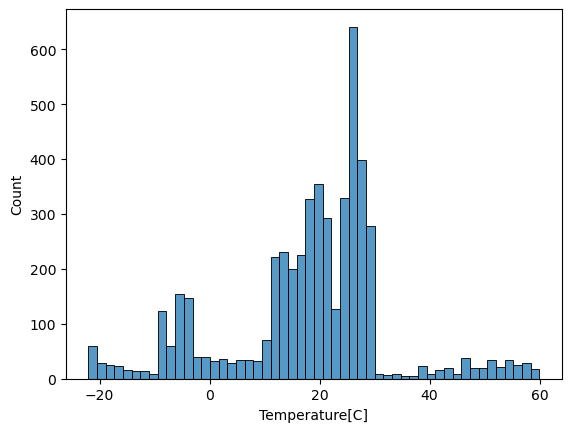

In [4]:
#bibliothèque nécessaire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#charger les données du dataset

df = pd.read_csv('../data/raw/train_dataset.csv')

#exploration des données

print(df.head())
print(df.info())
print(df.describe())

#visualisation des données 

sns.histplot(df['Temperature[C]'])
plt.show()



